In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from pathlib import Path
from scipy import stats
from skimage import io, filters
from skimage import color
from skimage import img_as_float
from skimage.util import view_as_windows
from skimage.transform import rescale
from skimage.feature import hog
from skimage import exposure

In [2]:
# Path to data
path_to_data = Path.cwd() / 'data'

# Load multiple images (image collection. loads on demand)
ic = io.ImageCollection(str(path_to_data / 'train' / '*.jpg'))

In [3]:
def image_show(image, nrows=1, ncols=1, cmap='gray', **kwargs):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

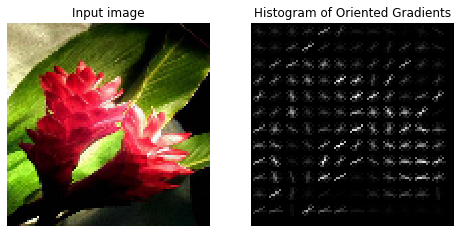

In [32]:
image = ic[1000]
rescaled_image = rescale(image, 0.2, anti_aliasing=False, multichannel=True)

fd, hog_image = hog(rescaled_image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(rescaled_image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [28]:
fd.shape

(25088,)

In [ ]:
pproc = []
for i, image in enumerate(ic):
    rescaled_image = rescale(image, 0.2, anti_aliasing=False, multichannel=True)

    fd, hog_image = hog(rescaled_image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

    pproc.append(fd)

    if i%500 == 0:
        print(ic.files[i])

In [ ]:
df = pd.DataFrame(pproc)
df.to_csv('training_hog.csv')